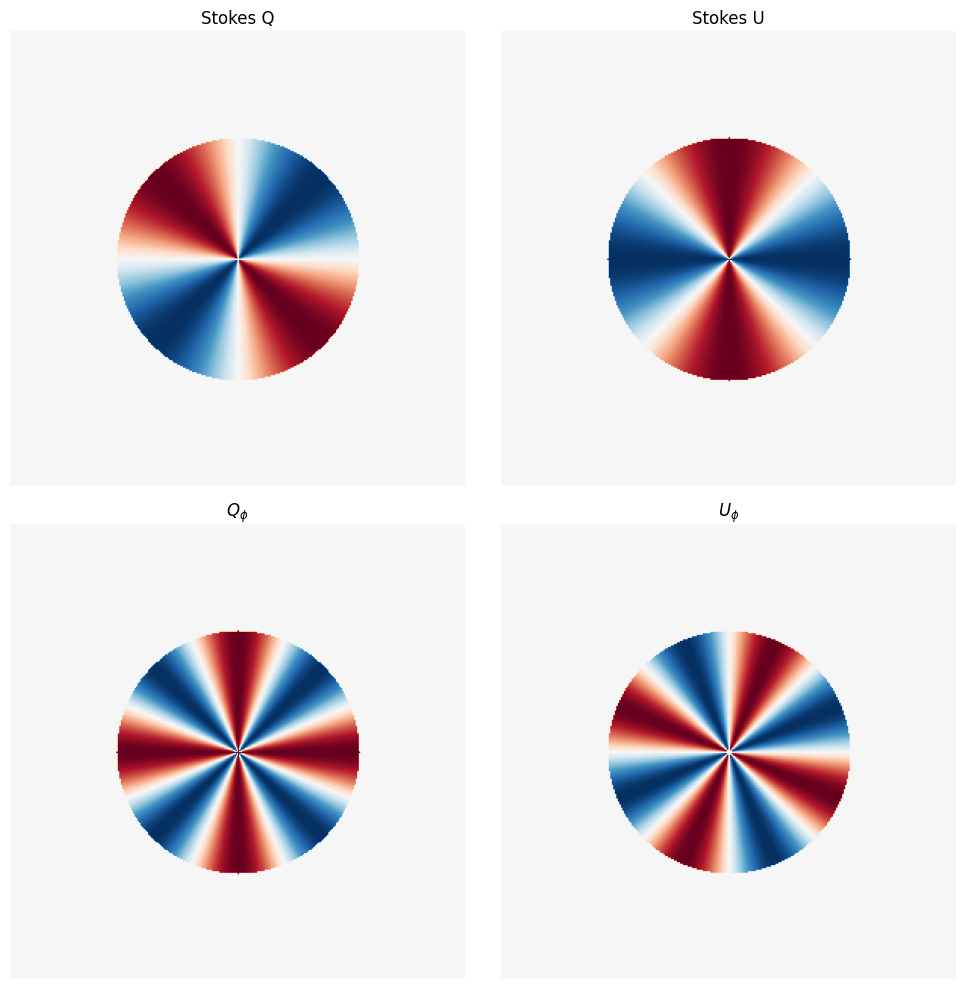

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import Ellipse2D

# Parameters
nx, ny = 300, 300  # Image size
x0, y0 = 150, 150  # Star position (center)
inclination = 0    # Disk inclination (degrees)
PA = 0             # Position angle of major axis (degrees)
radius = 80         # Disk radius (pixels)

# Create grid
x, y = np.meshgrid(np.arange(nx), np.arange(ny))

# Disk mask (elliptical for inclined disk)
a = radius  # Semi-major axis
b = a * np.cos(np.radians(inclination))  # Semi-minor axis
disk_mask = Ellipse2D.evaluate(x, y, amplitude=1, x_0=x0, y_0=y0, a=a, b=b, theta=np.radians(PA))

# Polarization vectors (tangential scattering)
phi_0 = np.pi/4.
dx, dy = x - x0, y - y0
angle = np.arctan2(dy, dx) + phi_0 # Azimuthal angle per pixel
Q = -disk_mask * np.cos(2 * angle)  # Antisymmetric Q
U = -disk_mask * np.sin(2 * angle)  # Antisymmetric U

# Transform to Q_phi/U_phi
phi = np.arctan2(dy, dx) + phi_0 # Same as angle, but can add offset (phi_0)
Q_phi = Q * np.cos(2 * phi) - U * np.sin(2 * phi)
U_phi = Q * np.sin(2 * phi) + U * np.cos(2 * phi)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
titles = ['Stokes Q', 'Stokes U', '$Q_\phi$', '$U_\phi$']
data = [Q, U, Q_phi, U_phi]

for ax, d, title in zip(axes.flatten(), data, titles):
    ax.imshow(d, cmap='RdBu_r', vmin=-1, vmax=1)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()